**Общая информация**

**Срок сдачи:** 16 марта 2020, 08:30 

**Штраф за опоздание:** по 1 баллу за 24 часа задержки. Через 5 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0220, Задание 1] Фамилия Имя.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
2. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.datasets import fetch_20newsgroups

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

##### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. 
Для подсчета расстояний можно использовать функции [отсюда](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

In [2]:
from scipy.spatial import distance
from sklearn.neighbors import KDTree

class MyKNeighborsClassifier(BaseEstimator):
    
    def __init__(self, n_neighbors, algorithm='brute'):
        self.algotithm = algorithm
        self.n_neighbors=n_neighbors
        self.algorithm=algorithm
    
    def fit(self, X, y):
        self.n=len(y)
        self.X_train = X
        self.y = np.asarray(y)
        if self.algorithm == 'kd_tree':
            self.tree = KDTree(X,leaf_size=30)
    
    def predict(self, X):
        result = np.zeros(X.shape[0],dtype=type(self.y[0]))
        if (self.algorithm == 'brute'):
            X = X.reshape(X.shape[0],-1)
            y = distance.cdist(X, self.X_train, 'minkowski', p=2)
            y1 = np.argpartition(y,kth=self.n_neighbors,axis=1)[:,:self.n_neighbors]
            for i in range(X.shape[0]):
                result[i] = type(self.y[0])(self.y[(y1[i])].sum()/self.n_neighbors)
            return result
        elif (self.algorithm == 'kd_tree'):
            dist, ind = self.tree.query(X, k=self.n_neighbors)
            for i in range(X.shape[0]):
                result[i] = type(self.y[0])(self.y[(ind[i])].sum()/self.n_neighbors)
            return result
    

**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [3]:
iris = datasets.load_iris()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [5]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [6]:
clf.fit(X_train, y_train)
my_clf.fit(X_train, y_train)

In [7]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 2 (0.5 балла)**

Давайте попробуем добиться скорости работы на fit, predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. 

In [8]:
%time clf.fit(X_train, y_train)

CPU times: user 2.84 ms, sys: 0 ns, total: 2.84 ms
Wall time: 2.25 ms


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [9]:
%time my_clf.fit(X_train, y_train)

CPU times: user 8 µs, sys: 5 µs, total: 13 µs
Wall time: 16.7 µs


In [10]:
%time clf.predict(X_test)

CPU times: user 2.85 ms, sys: 1.78 ms, total: 4.62 ms
Wall time: 3.01 ms


array([1, 1, 2, 1, 2, 0, 0, 1, 1, 2, 2, 0, 0, 2, 0])

In [11]:
%time my_clf.predict(X_test)

CPU times: user 1.55 ms, sys: 382 µs, total: 1.93 ms
Wall time: 938 µs


array([1, 1, 2, 1, 2, 0, 0, 1, 1, 2, 2, 0, 0, 2, 0])

###### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. Точность не должна уступать значению KNN из sklearn. 

In [12]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [13]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [14]:
%time clf.fit(X_train, y_train)

CPU times: user 955 µs, sys: 586 µs, total: 1.54 ms
Wall time: 1.11 ms


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [15]:
%time my_clf.fit(X_train, y_train)

CPU times: user 0 ns, sys: 727 µs, total: 727 µs
Wall time: 682 µs


In [16]:
%time clf.predict(X_test)

CPU times: user 5.54 ms, sys: 0 ns, total: 5.54 ms
Wall time: 3.69 ms


array([1, 1, 1, 0, 2, 1, 1, 0, 1, 2, 2, 0, 2, 0, 0])

In [17]:
%time my_clf.predict(X_test)

CPU times: user 611 µs, sys: 96 µs, total: 707 µs
Wall time: 567 µs


array([1, 1, 1, 0, 2, 1, 1, 0, 1, 2, 2, 0, 2, 0, 0])

In [18]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 4 (2.5 балла)**

Рассмотрим новый датасет 20 newsgroups

In [19]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])

In [20]:
data = newsgroups['data']
target = newsgroups['target']

Преобразуйте текстовые данные из data с помощью [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Словарь можно ограничить по частотности.

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import csr_matrix
vectorizer = CountVectorizer()
d = vectorizer.fit_transform(data)
# далее я ограничиваю словарь по частоте встречаемых слов в разных строках
sum1 = np.where((d.sum(axis=0)>1)&(d.sum(axis=0)<600))
sum1 = sum1[1]
d1 = d[:,sum1]

*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

In [22]:
from sklearn import model_selection
from sklearn.model_selection import StratifiedKFold, KFold
kf = KFold(n_splits=3)

In [23]:
# класс MyKNNClassifier для разреженных матриц(MyKNeighborsClassifier долго работает если приводить
# разреженную матрицу к обычной)

from sklearn.metrics import pairwise_distances

class MyKNNClassifier(BaseEstimator):
    
    def __init__(self, n_neighbors, algorithm='brute', metric_knn = 'euclidean'):
        self.algotithm = algorithm
        self.n_neighbors=n_neighbors
        self.algorithm=algorithm
        self.metric_knn = metric_knn
    
    def fit(self, X, y):
        self.n=len(y)
        self.w=1/self.n_neighbors
        self.X_train = X
        self.y = np.asarray(y)
    
    def predict(self, X):
        result = np.zeros(X.shape[0],dtype=type(self.y[0]))
        X = X.reshape(X.shape[0],-1)
        y = pairwise_distances(X, self.X_train, metric = self.metric_knn)
        y1 = np.argpartition(y,kth=self.n_neighbors,axis=1)[:,:self.n_neighbors]
        for i in range(X.shape[0]):
            result[i] = np.bincount(self.y[(y1[i])]).argmax()
        return result

Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальную точность в среднем на валидации на 3 фолдах).
Постройте график зависимости средней точности от количества соседей. Можно рассмотреть число соседей от 1 до 10.

best k = 1


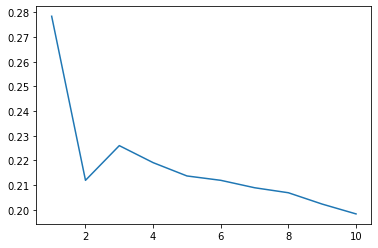

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def find_k(data, target, metr):
    x = np.arange(10, dtype = int)
    y = np.arange(10, dtype = float)
    best_k = 0
    max_score = 0
    score = 0
    for j in range(1,11):
        score = 0
        for train,test in kf.split(data):
            X_train = data[train]
            y_train = target[train]
            X_test = data[test]
            y_test = target[test]
            my_clf = MyKNNClassifier(n_neighbors=j, algorithm='brute', metric_knn = metr)
            my_clf.fit(X_train, y_train)
            my_clf_pred = my_clf.predict(X_test)
            tmp = accuracy_score(my_clf_pred,y_test)
            score += tmp
        x[j-1] = j
        y[j-1] = score/3
    k = y.argmax() + 1
    return (k, x, y)
fig = plt.figure()
k, x1, y1 = find_k(d1, target, 'euclidean')
ax1 = plt.plot(x1, y1)
print("best k =",k)

Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf векторизацию( sklearn.feature_extraction.text.TfidfVectorizer)

Сравните модели, выберите лучшую.

cosine: best k = 10
score = 0.6026163933252214


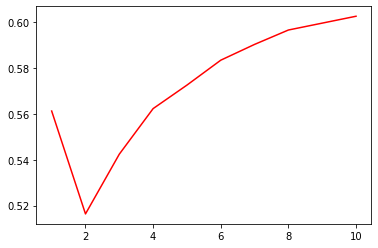

In [25]:
k, x, y = find_k(d1, target, 'cosine')
ax2 = plt.plot(x, y, color= 'r')
print("cosine: best k =",k)
print("score =",y.max())

euclidean(blue line): best k =  1
cosine(red line): best k =  10
косинусная метрика лучше евклидовой на валидации score = 0.6026163933252214
TfIdf векторизация заметно не отличается от CountVectorizer


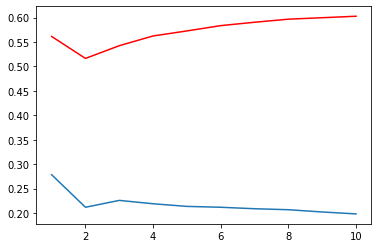

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import csr_matrix
vectorizer = TfidfVectorizer()
d_0 = vectorizer.fit_transform(data)
sum2 = np.where((d_0.sum(axis=0)>1)&(d_0.sum(axis=0)<600))
sum2 = sum2[1]
d_1 = d_0[:,sum2]
c = vectorizer.get_feature_names()
c1 = list(np.array(c)[sum2])


fig = plt.figure()
k, x1, y1 = find_k(d1, target, 'euclidean')
ax1 = plt.plot(x1, y1)
print("euclidean(blue line): best k = ",k)
k, x, y = find_k(d1, target, 'cosine')
ax2 = plt.plot(x, y, color= 'r')
print("cosine(red line): best k = ",k)

if(y.max()>y1.max()):
    print('косинусная метрика лучше евклидовой на валидации score =', y[k-1])
else:
    print('евклидова метрика лучше косинусной на валидации score =', y1[k-1])
print('TfIdf векторизация заметно не отличается от CountVectorizer')

Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [27]:
newsgroups = fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])

In [28]:
data1 = newsgroups['data']
target1 = newsgroups['target']
vect = TfidfVectorizer(vocabulary=c1)
b = vect.fit_transform(data1)

Оценим точность вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.

In [29]:
my_clf = MyKNNClassifier(n_neighbors=k, algorithm='brute', metric_knn = 'cosine')
my_clf.fit(d_1, target)
my_clf_pred = my_clf.predict(b)
tmp = accuracy_score(my_clf_pred,target1)
print('score = ', tmp)

score =  0.5389006903876792


точность уменьшилась, возможно потому, что словарь на train был ограничен по частотности(т.е. частота слов в 
тесте не учитывалась при ограничении словаря)